In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
connect_db = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
query = 'PRAGMA table_info(checker);'
pd.io.sql.read_sql(query, connect_db)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,status,TEXT,0,None,0
2,2,success,INTEGER,0,None,0
3,3,timestamp,TIMESTAMP,0,None,0
4,4,numTrials,INTEGER,0,None,0
5,5,labname,TEXT,0,None,0
6,6,uid,TEXT,0,None,0


In [3]:
query = '''
        select uid, timestamp from checker where uid like 'user_%'
        '''
df = pd.io.sql.read_sql(query, connect_db, parse_dates=['timestamp'])
df.head()

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370


In [4]:
df['day'] = df.timestamp.dt.day
df['weekday'] = df.timestamp.dt.dayofweek
df['hour'] = df.timestamp.dt.hour
df.drop('timestamp', axis=1, inplace=True)
df

,uid,day,weekday,hour
0,user_4,17,4,5
1,user_4,17,4,5
2,user_4,17,4,5
3,user_4,17,4,5
4,user_4,17,4,5
...,...,...,...,...
3202,user_1,21,3,20
3203,user_1,21,3,20
3204,user_1,21,3,20
3205,user_1,21,3,20


In [5]:
ds = df

ds.loc[df['weekday'] < 5, 'weekday'] = 'working_day'
ds.loc[df['weekday'] != 'working_day', 'weekday'] = 'weekend'
ds

,uid,day,weekday,hour
0,user_4,17,working_day,5
1,user_4,17,working_day,5
2,user_4,17,working_day,5
3,user_4,17,working_day,5
4,user_4,17,working_day,5
...,...,...,...,...
3202,user_1,21,working_day,20
3203,user_1,21,working_day,20
3204,user_1,21,working_day,20
3205,user_1,21,working_day,20


In [6]:
ds_weekend = ds[ds.weekday == 'weekend']
ds_weekend

,uid,day,weekday,hour
23,user_17,18,weekend,7
24,user_30,18,weekend,13
25,user_2,18,weekend,13
26,user_2,18,weekend,13
27,user_2,18,weekend,13
...,...,...,...,...
3088,user_16,17,weekend,22
3089,user_16,17,weekend,22
3090,user_16,17,weekend,22
3091,user_16,17,weekend,22


In [7]:
working_day = ds[ds.weekday != 'weekend']
working_day

,uid,day,weekday,hour
0,user_4,17,working_day,5
1,user_4,17,working_day,5
2,user_4,17,working_day,5
3,user_4,17,working_day,5
4,user_4,17,working_day,5
...,...,...,...,...
3202,user_1,21,working_day,20
3203,user_1,21,working_day,20
3204,user_1,21,working_day,20
3205,user_1,21,working_day,20


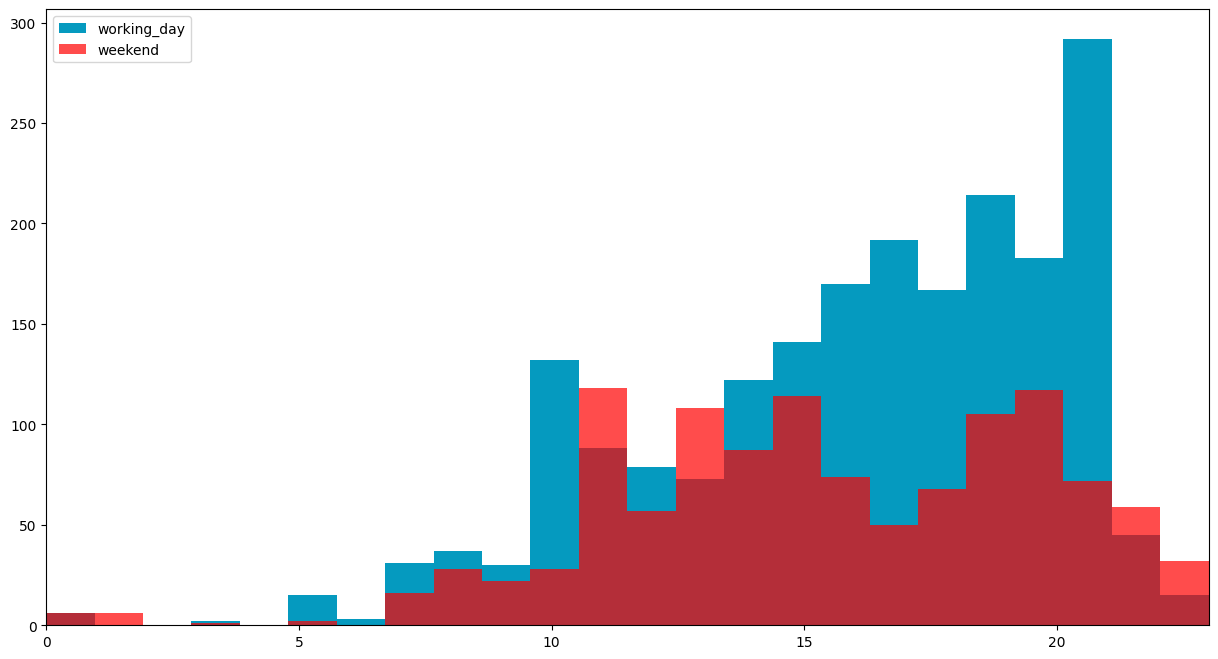

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(working_day.hour, bins=24, label='working_day', color='#059ABF')
ax.hist(ds_weekend.hour, bins=24, label='weekend', color='red', alpha=0.7)
ax.set_xlim(0, 23)
ax.legend(loc='upper left', fontsize='10')
plt.show()

In [9]:
ds_group_week = ds_weekend.groupby('hour').count()['uid'].reset_index()
ds_group_work = working_day.groupby('hour').count()['uid'].reset_index()
df_cont = pd.concat([ds_group_week, ds_group_work],axis= 1)
df_cont.columns = ['hour_week', 'count_week', 'hour_work','count_work']
df_cont['delt'] = df_cont.count_week - df_cont.count_work
df_cont.sort_values('delt')

,hour_week,count_week,hour_work,count_work,delt
18,21,72,21,292,-220
14,17,50,17,192,-142
16,19,105,19,214,-109
7,10,28,10,132,-104
15,18,68,18,167,-99
13,16,74,16,170,-96
17,20,117,20,183,-66
11,14,87,14,122,-35
12,15,114,15,141,-27
9,12,57,12,79,-22


In [11]:
connect_db.close()